In [1]:
import numpy as np
from scipy import signal, sparse
import skimage as sk
import skimage.filters as sf
import skimage.io as skio
from skimage.io import imsave, imshow, show
from skimage.color import grey2rgb

from operations import *
from utils import *

In [ ]:
impathToy = 'sample_imgs/samples/toy_problem.png'
imT = skio.imread(impathToy)
imT = sk.img_as_float(imT)

impathM = 'sample_imgs/spline/mask2.jpg'
imM = skio.imread(impathM)
imM = sk.img_as_float(imM)

impathToyMask = 'sample_imgs/samples/toy_problem mask.png'
imToyMask = skio.imread(impathToyMask)
imToyMask = sk.img_as_float(imToyMask)
# viewImage(imToyMask)

impathToyMaskMix = 'sample_imgs/samples/toy_problem mask_mix.png'
imToyMaskMix = skio.imread(impathToyMaskMix)
imToyMaskMix = sk.img_as_float(imToyMaskMix)
# viewImage(imToyMaskMix)

impathToyCol = 'sample_imgs/samples/toy_problem_color.png'
imToyCol = skio.imread(impathToyCol)
imToyCol = sk.img_as_float(imToyCol)
# viewImage(imToyMask)

impathPengChick = 'sample_imgs/samples/penguin-chick.jpeg'
imPengChick = skio.imread(impathPengChick)
imPengChick = sk.img_as_float(imPengChick)
# viewImage(imPengChick)

impathPeng = 'sample_imgs/samples/penguin.jpg'
imPeng = skio.imread(impathPeng)
imPeng = sk.img_as_float(imPeng)
viewImage(imPeng)

impathPengMask = 'sample_imgs/samples/penguin_mask.png'
imPengMask = skio.imread(impathPengMask)
imPengMask = sk.img_as_float(imPengMask)
viewImage(imPengMask)

impathIm3 = 'sample_imgs/samples/im3.jpg'
imIm3 = skio.imread(impathIm3)
imIm3 = sk.img_as_float(imIm3)
viewImage(imIm3)

/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


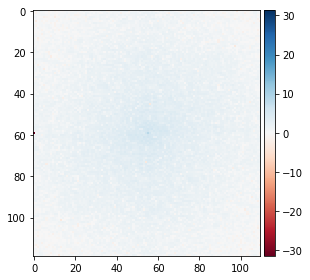

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


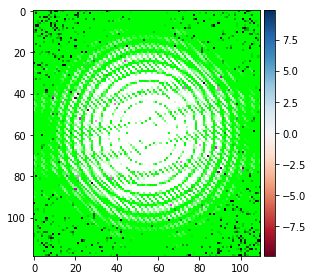

In [93]:
gray_image = imT
grayscale = np.log(np.abs(np.fft.fftshift(np.fft.fft2(gray_image))))

col_image = imToyCol
colll = np.log(np.abs(np.fft.fftshift(np.fft.fftn(col_image))))

viewImage(grayscale)
viewImage(colll)

In [111]:
import os
def readImageNName(impath1):
    imname1 = "".join(os.path.basename(impath1).split(".")[:-1])
    im1 = skio.imread(impath1)
    im1 = sk.img_as_float(im1)

    return im1, imname1
def grayFourier(gray_image):
    result = np.log(np.abs(np.fft.fftshift(np.fft.fft2(gray_image))))
    # resultClipped = np.clip(result, -1, 1)
    return result

In [112]:
def scalerNN(LM):  # scales to 0 1
    return np.dot(LM - LM.min(), 1 / (LM.max() - LM.min())) * 2 - 1

0.0 0.9999999999999999
-1.0 0.9999999999999998


/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


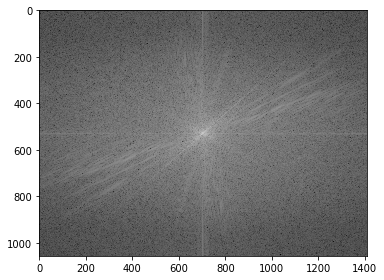

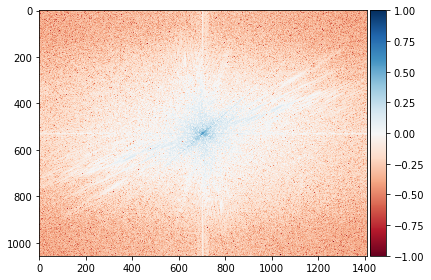

In [123]:
from skimage.color import rgb2gray
result = readImageNName('sample_imgs/nutmeg.jpg')[0]
sss = grayFourier(rgb2gray(result))
print(scaler(sss).min(), scaler(sss).max())
print(scalerNN(sss).min(), scalerNN(sss).max())
testImage("nutmeg.jpg", scaler(sss), disp=True)
testImage("nutmeg_NN.jpg", scalerNN(sss), disp=True)

In [4]:
mask = np.ones(imT.shape)

def createNonZeroPairs(mask):
    #TODO extend
    if mask.ndim == 3:
        mask = np.squeeze(np.dsplit(mask, [1])[0], axis=2)
        # change 3 channel to 1 value per pixel,
        # specifically using the 0th channel's
    maskNonZero = mask.nonzero()
    
#    return maskNonZero
    
    nonZeroIndices = []
#    mask
    for i in range(len(maskNonZero[0])):
        nonZeroIndices.append((maskNonZero[0][i], maskNonZero[1][i]))
    
    return nonZeroIndices

#####
# mask.nonzero() ## assume it's 1D

def makeIm2Var(mask):
    nonZeroIndices = createNonZeroPairs(mask)
    
    maskHeight, maskWidth = mask.shape
    # print("weepweep: ", maskHeight, maskWidth)

    dictIm2Var = dict()
    dictVar2Im = dict()
    
    dictRow2Cols = dict()
    dictCol2Rows = dict()

    fTup2Key = (lambda tup: "%i-%i" % tup)
    fYX2Key = (lambda y, x: fTup2Key((y, x)))

    for i in range(len(nonZeroIndices)):
        pair = nonZeroIndices[i]
        row, col = pair
        
        if row not in dictRow2Cols:
            dictRow2Cols[row] = []
        dictRow2Cols[row].append(col)
        
        if col not in dictCol2Rows:
            dictCol2Rows[col] = []
        dictCol2Rows[col].append(row)
        
        key = fTup2Key(pair)
        dictIm2Var[key] = i
        dictVar2Im[i] = pair

    im2Var = (lambda y, x: dictIm2Var[fYX2Key(y, x)])
    var2Im = (lambda x: dictVar2Im[x])
    totalUnknowns = len(nonZeroIndices)
    
    dictCol2Borders = dict()
    dictRow2Borders = dict()
    
    def getColBorders(col, mode):
        if mode == "ltr":
            mode = 0
        elif mode == "rtl":
            mode = 1
        elif mode == "both":
            mode = 2
        else:
            raise Exception("unrecognized mode")
        return dictCol2Borders[col][mode]
    def getRowBorders(row, mode):
        if mode == "ltr":
            mode = 0
        elif mode == "rtl":
            mode = 1
        elif mode == "both":
            mode = 2
        else:
            raise Exception("unrecognized mode")
        return dictRow2Borders[row][mode]


    for col, rows in dictCol2Rows.items():
        dictCol2Borders[col] = findBorders(rows, maskHeight - 1)
    for row, cols in dictRow2Cols.items():
        dictRow2Borders[row] = findBorders(cols, maskWidth - 1)
    
    # print(dictIm2Var)
    return im2Var, var2Im, totalUnknowns, dictRow2Cols, dictCol2Rows, getColBorders, getRowBorders

# im2Var, var2Im, totalUnknowns, dictRow2Cols, dictCol2Rows, getColBorders, getRowBorders = makeIm2Var(mask)

# im2Var(3, 2)

In [77]:
# targetYX = (1576, 1088)
# imTarg = imIm3
# imSrc = imPeng
# srcMask = imPengMask

# targetYX = (0, 0)
# imTarg = imToyCol
# imSrc = imToyCol
# srcMask = imToyMaskMix

targetYX = (0, 0)
imTarg = imT
imSrc = imT
srcMask = imToyMaskMix
newImSrc, newSrcMask = shiftObjectNMask(targetYX, imSrc, srcMask, imTarg)

im2Var, var2Im, totalUnknowns, dictRow2Cols, dictCol2Rows, getColBorders, getRowBorders = makeIm2Var(newSrcMask)

119 110


In [76]:
def getPixWCC(im, y, x, colorChannel = None):
    if colorChannel == None:
        return im[y, x]
    elif colorChannel < 3:
        return im[y, x, colorChannel]
    else:
        raise Exception("Unrecognized colorChannelCt:" + str(colorChannel))

Starting LSQR, color channel: None
Finished LSQR, color channel: None


/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


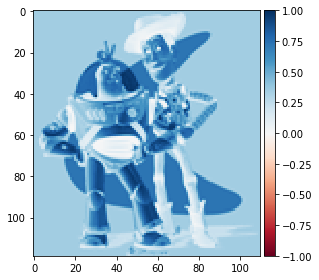

In [82]:

# totalUnknowns = rHeight * rWidth #change

-

In [ ]:
# bnewA, bb

# testt = []
# testtb = []
# testttt = []
# testtttb = []
# for row in dictRow2Cols:
#     for i in getRowBorders(row, "ltr"):
#         testt.append((row, i))
#         testttt.append(im2Var(row, i))
#     for j in getRowBorders(row, "rtl"):
#         testtb.append((row, j))
#         testtttb.append(im2Var(row, j))
# print(testt)
# print(testtb)
# print(testttt)
# print(testtttb)
# print(bnewA.nonzero()[1])

In [ ]:
resolve = sparse.linalg.lsqr(newA, b)

In [ ]:
# newA.shape, outReg_A.shape
b.shape, outReg_b.shape

In [ ]:
"""
matchback var id to im coord
create new photo where
    if in region, use the var id
    else if outregion, use target image
"""



In [ ]:
# asda = newSrcMask == 1
# print(newSrcMask.shape, asda.shape)



In [ ]:
# reconstruct from solution 2 im

finalIm = np.zeros((rHeight, rWidth)) #watch this break lmao

solution = resolve[0]

# for x in enumerate(solution):
#     print(x)

for varId, sol in enumerate(solution):
    # print(var2Im(varId))
    
    y, x = var2Im(varId)
    
    finalIm[y, x] = sol

testImage("hooo5.png", finalIm)

In [85]:
def findBorders(row, maxIndex):
#     if mode == "rtl":
#         RTL = True
#         LTR = False
#     elif mode == "ltr":
#         RTL = False
#         LTR = True
#     elif mode == "both":
#         RTL = True
#         LTR = True
    """
    input = [1, 2, 5, 6]
    output = [2, 5]
    # q: do we care about image boundary boundaries
    # a: no, it'll eff up the algo -- if you need image boundary stuff
    # add it separately on the algo
    """
    assert row[-1] <= maxIndex

    ltrBorders = set()
    rtlBorders = set()
    
    if len(row) == 0:
        return row
    
    minIndex = 0
        
    diff = [row[0] - (minIndex - 1)]
    for i in range(1, len(row)):
        diff.append(row[i] - row[i-1])
    diff.append(maxIndex + 1 - row[-1])
    # print(diff)
    
    for ind, val in enumerate(diff):
        if val > 1:
            # if RTL:
            if ind - 1 >= 0: # comment this out to get left to right edge
                rtlBorders.add(row[ind - 1])
            #if LTR:
            if ind < len(row): # comment this out to get right to left edge
                ltrBorders.add(row[ind])
    
    return ltrBorders, rtlBorders, ltrBorders.union(rtlBorders)

findBorders([0, 2, 4, 5, 6, 7], 8)

({2, 4}, {0, 2, 7}, {0, 2, 4, 7})

In [5]:

# def shiftObjectNMask(imSrc, srcMask, imTarg):
# imTarg = np.zeros([5,5])
# imSrc = np.dot(3, np.ones([2,2]))
# srcMask = np.ones([2,2])
tt_targetYX = (0, 0)

###

def shiftObjectNMask(targetYX, imSrc, srcMask, imTarg):

    if imTarg.ndim == 3:
        targHeight, targWid, _ = imTarg.shape
    elif imTarg.ndim == 2:
        targHeight, targWid = imTarg.shape

    if imSrc.ndim == 3:
        srcHeight, srcWid, _ = imSrc.shape
    elif imSrc.ndim == 2:
        srcHeight, srcWid = imSrc.shape

    # print(srcMask.shape)
    assert (srcHeight, srcWid) == srcMask.shape
    assert targWid and targHeight and srcWid and srcHeight

    rowStart = targetYX[0]
    rowEnd = targetYX[0]+srcHeight
    colStart = targetYX[1]
    colEnd = targetYX[1]+srcWid

    if rowStart < 0 or rowEnd > targHeight or colStart < 0 or colEnd > targWid:
        raise Exception("source img doesn't fit target img in the given location: %s" % str(img))
        
    print(targHeight, targWid)

    if imSrc.ndim == 3:
        newImSrc = np.zeros((targHeight, targWid, 3))
        newImSrc[rowStart:rowEnd, colStart:colEnd, 0] = imSrc[:, :, 0]
        newImSrc[rowStart:rowEnd, colStart:colEnd, 1] = imSrc[:, :, 1]
        newImSrc[rowStart:rowEnd, colStart:colEnd, 2] = imSrc[:, :, 2]
    elif imSrc.ndim == 2:
        newImSrc = np.zeros((targHeight, targWid))
        newImSrc[rowStart:rowEnd, colStart:colEnd] = imSrc
    
    newSrcMask = np.zeros((targHeight, targWid))
    newSrcMask[rowStart:rowEnd, colStart:colEnd] = srcMask
    
    return newImSrc, newSrcMask

    ####

# imTarg, imSrc

# newww, newwm = shiftObjectNMask(tt_targetYX, imToyCol, imToyMask, imPengChick)
# print(imPengChick.shape)

# viewImage(newww)
# viewImage(newwm)
# viewImage(imPengChick)

#  newww



In [ ]:
np.array([1]).shape == np.array([1]).shape 

In [ ]:
"""
for every row:
    for every pixel I in ltr:
        add to A a 1 in position im(row, I)
        add to B = imTarg[I+1]
        #just get ready to change this shit to imTarg[row, I+1] - imTarg[row, I]
    for every pixel I in rtl:
        add to A a 1 in position im(row, I)
        add to B = imTarg[row, I-1]
        #just get ready to change this shit to imTarg[row, I] - imTarg[row, I-1]

for every col:
    for every pixel J in ltr:
        add to A a 1 in position im(J, col)
        add to B = imTarg[J+1, col]
        #just get ready to change this shit to imTarg[J+1, col] - imTarg[J, col]
    for every pixel J in rtl:
        add to A a 1 in position im(J, col)
        add to B = imTarg[J-1, col]
        #just get ready to change this shit to imTarg[J, col] - imTarg[J-1, col]
    
"""

In [ ]:
"""
neg1_changeListY = []
neg1_changeListX = []

pos1_changeListY = []
pos1_changeListX = []

### X-DIR GRADIENTS
per y row:
    if size of region in this row is 1 or less:
        continue
    increase newLineCt
    for every pixel i in the row except last one:
        neg1_changeListY.append(newLineCt)
        neg1_changeListX.append(im2Var(y, i))
        
        pos1_changeListY.append(newLineCt)
        pos1_changeListX.append(im2Var(y, i+1))
        # first index = most left in region
        # last index = most right in region
per x cols:
    if size of region in this column is 1 or less:
        continue
    increase newLineCt
    for pix j in this col except last one:
        neg1_changeListY.append(newlineCt)
        neg1_changeListX.append(im2Var(j, x))
        
        pos1_changeListY.append(newlineCt)
        pos1_changeListX.append(im2Var(j+1, x))

"""

In [ ]:
# impath1 = 'sample_imgs/spline/apple.jpeg'
# im1 = skio.imread(impath1)
# im1 = sk.img_as_float(im1)

# impath2 = 'sample_imgs/spline/orange.jpeg'
# im2 = skio.imread(impath2)
# im2 = sk.img_as_float(im2)

# impathM = 'sample_imgs/spline/mask2.jpg'
# imM = skio.imread(impathM)
# imM = sk.img_as_float(imM)

In [ ]:
def scaler(LM): # scales to 0 1
    return np.dot(LM - LM.min(), 1 / (LM.max() - LM.min()))# * 2 - 1

def multiResBlendOp(im1, im2, mask, levels, sigma):
    assert im1.shape == im2.shape == mask.shape

    L1 = laplacianPyrOp_3D(im1, levels, sigma)
    L2 = laplacianPyrOp_3D(im2, levels, sigma)
    LM = gaussStackOp_3D(mask, levels, sigma) # laplacianPyrOp_3D(mask, levels, sigma)
    
    # LM_blur = gaussStackOp_3D(mask, levels, sigma)
    
    for i in range(len(L1)):
        viewImage(LM[i])
    
#     LM1 = np.dot(LM - LM.min(), 1 / (LM.max() - LM.min())) ## scale LM to [0, 1]
#     LM1 = LM1

#     print(LM.min(), LM.max())
    LM1 = LM
    LM2 = (1 - LM1)
    
#     print("HELP: ", LM1[0, 0, 0, 0], LM2[0, 0, 0, 0])
#     print(L1.min(), L1.max())
#     print(L2.min(), L2.max())
#     return
    
    L1_post = LM1 * L1 
    for i in range(len(L1)):
        viewImage(scaler(L1_post[i]))
    L2_post = LM2 * L2
    
    finalL =  L1_post + L2_post

    # levelsDim, heightDim, widthDim, channelDim = L1.shape
    
    tes = np.zeros(L1[0].shape)
    
    for i in range(len(L1)):
        viewImage(scaler(finalL[i]))
        tes += finalL[i]
    
    viewImage(tes)
    
#     for i in range(len(L1)):
#         viewImage(L1[i])

    
    # print(LM)
    

multiResBlendOp(im1, im2, imM, 10, 10)

In [ ]:
a = np.array([
    [
        [3, 3, 3], [1, 1, 1]
    ], # 1st row
    [
        [3, 3, 3], [1, 1, 1]
    ], # 2nd row
])
b = np.array([
    [
        [1, 2, 1]
    ],
    [
        [1, 1, 1]
    ]
])

#to convert 3-channel to just one of the channels, primarily the 0th one
np.squeeze(np.dsplit(a, [1])[0], axis=2)

In [ ]:
cccc = np.zeros((4, 4))
cccc[(1, 1)] = 1
cccc

In [ ]:
# im = im1
# im2 = gaussBlurOp_3D(im, sigma=20)
# viewImage(im)
# viewImage(im2)
# res = im - im2
# print(res.min(), res.max())
# result = (res - res.min())/(res.max()-res.min())
# #viewImage(np.dot(res, 255))
# viewImage(result)